In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.utils.data as data
import os


# dataloader

In [2]:
'''
transform = transforms.Compose([transforms.Resize((96,96)),
                                transforms.RandomHorizontalFlip(p=0.9),transforms.RandomVerticalFlip(p=0.9),
                                #transforms.ColorJitter(brightness=(0, 5), contrast=(0, 5), saturation=(0, 5), hue=(-0.1, 0.1)),
                                transforms.RandomRotation(30, expand=False, center=(48, 48)),
                                transforms.ToTensor()])
                                #transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))])
transform1 = transforms.Compose([transforms.Resize((96,96)),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('traindata/',transform=transform)
ratio =0.8
TOTAL_SIZE= len(dataset)
train_len = round(TOTAL_SIZE * ratio)
valid_len = round(TOTAL_SIZE * (1-ratio))

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_len, valid_len])

# your setting
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True) 
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True) 
print(dataset)
print(dataset.class_to_idx)

dataset1 = datasets.ImageFolder('traindata/',transform=transform)
dataset2 = datasets.ImageFolder('traindata/',transform=transform)
image_datasets = torch.utils.data.ConcatDataset([dataset1, dataset2])
dataset = dict()
dataset['train'], dataset['val'] = torch.utils.data.random_split(image_datasets, (round(0.8*len(image_datasets)), round(0.2*len(image_datasets))))
#delete transforms.Grayscale() owing to vgg16
train_data_loader = torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True) 
val_data_loader = torch.utils.data.DataLoader(dataset['val'], batch_size=32, shuffle=False) 
'''

"\ntransform = transforms.Compose([transforms.Resize((96,96)),\n                                transforms.RandomHorizontalFlip(p=0.9),transforms.RandomVerticalFlip(p=0.9),\n                                #transforms.ColorJitter(brightness=(0, 5), contrast=(0, 5), saturation=(0, 5), hue=(-0.1, 0.1)),\n                                transforms.RandomRotation(30, expand=False, center=(48, 48)),\n                                transforms.ToTensor()])\n                                #transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))])\ntransform1 = transforms.Compose([transforms.Resize((96,96)),\n                                transforms.ToTensor()])\ndataset = datasets.ImageFolder('traindata/',transform=transform)\nratio =0.8\nTOTAL_SIZE= len(dataset)\ntrain_len = round(TOTAL_SIZE * ratio)\nvalid_len = round(TOTAL_SIZE * (1-ratio))\n\ntrain_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_len, valid_len])\n\n# your setting\ntrain_data_loader = to

In [2]:
from torch.utils.data import Dataset
class TVDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        #sample = {'image': dataset[idx][0], 'label': dataset[idx][1]}
 
        if self.transform:
            image = self.transform(dataset[idx][0])
        #labels=torch.tensor(labels, dtype=torch.long) 
        return (image,dataset[idx][1])

In [3]:
from torch.utils.data import Dataset
from io import BytesIO
from PIL import Image, ImageFile
import io
ImageFile.LOAD_TRUNCATED_IMAGES = True


    
class New_TVDataset(Dataset):
    def __init__(self, imagelist,labellist, transform=None):
        self.image_list = imagelist
        self.label_list = labellist
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        try:
            image = Image.open(self.image_list[idx]).convert('RGB')
        
        
            if self.transform:
                image = self.transform(image)
                
            return (image, self.label_list[idx])
        #labels=torch.tensor(labels, dtype=torch.long) 
        except(OSError, NameError):
            print('OSError, Path:',self.image_list[idx])
        '''
        with open(self.image_list[idx], 'rb') as f:
            b = BytesIO()
            f.seek(15, 0)

            b.write(f.read())
            
            byteImgIO = io.BytesIO()
            image = Image.open(b)
            image.save(byteImgIO, "PNG")
            byteImgIO.seek(0)
            byteImg = byteImgIO.read()

            # Non test code
            dataBytesIO = io.BytesIO(byteImg)
            image =Image.open(dataBytesIO).convert('RGB')
            #image.load()
        '''

In [4]:
import glob
train_labels=[]
#TRAIN_DATA_PATH = 'traindata/'
#TEST_BATA_PATH='testdata/'

#Airplanes
train_images = glob.glob ('traindata/airplane/*')
airplane_num=len(train_images)
for i in range(airplane_num):
    train_labels.extend([5])
    
#Bird
train_images += glob.glob ('traindata/bird/*')
bird_num=len(train_images)-airplane_num
for i in range(bird_num):
    train_labels.extend([2])
    
#Car
train_images += glob.glob ('traindata/car/*')
car_num=len(train_images) - airplane_num - bird_num
for i in range(car_num):
    train_labels.extend([4])

#Cat
train_images += glob.glob ('traindata/cat/*')
cat_num=len(train_images) - airplane_num - bird_num - car_num
for i in range(cat_num):
    train_labels.extend([0])

#Dog
train_images += glob.glob ('traindata/dog/*')
dog_num=len(train_images) - airplane_num - bird_num - car_num - cat_num
for i in range(dog_num):
    train_labels.extend([1])
    
#Horse
train_images += glob.glob ('traindata/horse/*')
horse_num=len(train_images) - airplane_num - bird_num - car_num - cat_num - dog_num
for i in range(horse_num):
    train_labels.extend([3])

import random
c = list(zip(train_images, train_labels))
random.shuffle(c)
train_images, train_labels = zip(*c)

transform = transforms.Compose([transforms.Resize((96,96)),
                                transforms.RandomHorizontalFlip(p=0.9),transforms.RandomVerticalFlip(p=0.9),
                                transforms.ColorJitter(brightness=(0, 5), contrast=(0, 5), saturation=(0, 5), hue=(-0.1, 0.1)),
                                transforms.RandomRotation(30, expand=False, center=(48, 48)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
                                ])

transform1 = transforms.Compose([transforms.Resize((96,96)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
                                ])
#transforms.Grayscale()

ratio =0.8
TOTAL_SIZE= len(train_images)
train_len = round(TOTAL_SIZE * ratio)
valid_len = round(TOTAL_SIZE * (1-ratio))
val_images=train_images[train_len:]
val_labels=train_labels[train_len:]
tr_images=train_images[:train_len]
tr_labels=train_labels[:train_len]
train_dataset=New_TVDataset(tr_images,tr_labels,transform)
val_dataset=New_TVDataset(val_images,val_labels,transform1)
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True) 
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False) 

In [6]:
image,label=next(iter(val_data_loader))

In [7]:
image.shape

torch.Size([32, 3, 96, 96])

tensor(3)


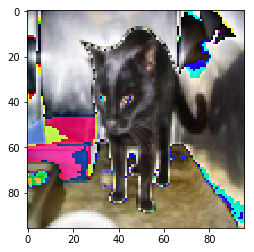

In [8]:
n=12
plt.imshow((np.transpose(image[n].numpy(), (1, 2, 0))* 255).astype('uint8'))
print(label[n])


In [20]:
import torchvision.models as models

model = models.vgg16(pretrained=True)
#model.classifier[6] = nn.Linear(4096,6) #6 classes


for param in model.parameters():
    param.requires_grad = False
    
#model.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
##                                       torch.nn.ReLU(),
 #                                      torch.nn.Dropout(p=0.5),
 #                                      torch.nn.Linear(4096, 4096),
 #                                      torch.nn.ReLU(),
 #                                      torch.nn.Dropout(p=0.5),
 #                                      torch.nn.Linear(4096, 6))
model.classifier[6] = nn.Linear(4096,6)
model = model.cuda() 
#00: False->true

In [14]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the model so that you don't need to train the model again
model = torch.load("vgg.pth").to(device)

In [6]:
# I have written the function for you this time, but it's strongly recommended that you 
# understand how to do training and validation
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(model, data_loader, optimizer, epoch,criterion, verbose=True):
    model.train()
    loss_avg = 0.0
    running_corrects=0
    for batch_idx, (data, target) in enumerate(data_loader):
        data, target = data.to(device), target.to(device)
        
        output = model(data) 
        
        # loss function
        
        
        loss = criterion (output,target)
        loss_avg += loss.item()*data.size(0)
        _, preds = torch.max(output, 1)
        running_corrects += torch.sum(preds == target.data)                                  
        
        # do back propagation
        optimizer.zero_grad() 
        
        loss.backward()
        optimizer.step()

        
        #print
        #verbose_step = len(data_loader) // 10
        verbose_step=100
        if batch_idx % verbose_step == 0 and verbose:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(data_loader.dataset),
                100. * batch_idx / len(data_loader), loss.item()))
    print('-> Train Epoch: {} \tLoss: {:.6f}\tCorrect:{:.2f}%'.format(epoch,loss_avg / len(data_loader.dataset),100.*running_corrects.double()/len(data_loader.dataset)))
    return loss_avg / len(data_loader.dataset)

def valid(model, data_loader):
    with torch.no_grad():
        model.eval()
        valid_loss = 0
        correct = 0
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            #00
            criterion  = nn.CrossEntropyLoss()
            
            loss   = criterion (output, target) 
            valid_loss +=loss.item()*data.size(0)  # sum up batch loss
            #pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            #correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()
            _, preds = torch.max(output, 1)
            correct += (preds == target).sum().item()        

        valid_loss /= len(data_loader.dataset)
        #valid_loss /= len(data_loader)
        print('Valid set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            valid_loss, correct, len(data_loader.dataset),
            100. * correct / len(data_loader.dataset)))
    return float(correct) / len(data_loader.dataset)

In [ ]:
####################  implement your optimizer ###################################
## yo can use any training methods if you want (ex:lr decay, weight decay.....)


lr=0.001
#optimizer = optim.Adam(model.parameters(), lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5, amsgrad=False)
optimizer = torch.optim.SGD(model.classifier.parameters(), lr=lr,momentum=0.09)
scheduler = ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=10, min_lr=0.000001, eps=1e-08, threshold=0.0001, threshold_mode='rel', cooldown=0, verbose=True)
criterion  = nn.CrossEntropyLoss()
# start training
epochs = 600
acc = 0.86
for epoch in range(epochs):
    model.train()
    loss = train(model, train_data_loader, optimizer, epoch,criterion)
    
    accuracy = valid(model, val_data_loader)
    scheduler.step(loss)
    if accuracy > acc:
        acc = accuracy
        print("-------------saving model--------------")
        # save the model
        torch.save(model, "vgg.pth")

Train Epoch: 0 [0/10749 (0%)]	Loss: 1.087584
Train Epoch: 0 [3200/10749 (30%)]	Loss: 1.117228


/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 byt

Train Epoch: 0 [6400/10749 (60%)]	Loss: 1.270912
Train Epoch: 0 [9600/10749 (89%)]	Loss: 1.029752


/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/home/NFS/course/mlintro/mlintro2021s/mlintro2021s21/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes 

-> Train Epoch: 0 	Loss: 1.180551	Correct:53.93%
Valid set: Average loss: 0.4005, Accuracy: 2298/2687 (86%)

Train Epoch: 1 [0/10749 (0%)]	Loss: 1.255268
Train Epoch: 1 [3200/10749 (30%)]	Loss: 1.177576
Train Epoch: 1 [6400/10749 (60%)]	Loss: 1.132425
Train Epoch: 1 [9600/10749 (89%)]	Loss: 1.266129
-> Train Epoch: 1 	Loss: 1.167149	Correct:54.32%
Valid set: Average loss: 0.4022, Accuracy: 2310/2687 (86%)

Train Epoch: 2 [0/10749 (0%)]	Loss: 1.117753
Train Epoch: 2 [3200/10749 (30%)]	Loss: 1.268880
Train Epoch: 2 [6400/10749 (60%)]	Loss: 1.068210
Train Epoch: 2 [9600/10749 (89%)]	Loss: 1.326245
-> Train Epoch: 2 	Loss: 1.156366	Correct:55.18%
Valid set: Average loss: 0.4030, Accuracy: 2313/2687 (86%)

-------------saving model--------------
Train Epoch: 3 [0/10749 (0%)]	Loss: 1.241110
Train Epoch: 3 [3200/10749 (30%)]	Loss: 1.234621
Train Epoch: 3 [6400/10749 (60%)]	Loss: 0.881750
Train Epoch: 3 [9600/10749 (89%)]	Loss: 1.197999
-> Train Epoch: 3 	Loss: 1.175533	Correct:53.21%
Valid se

Train Epoch: 28 [3200/10749 (30%)]	Loss: 0.918642
Train Epoch: 28 [6400/10749 (60%)]	Loss: 1.166896
Train Epoch: 28 [9600/10749 (89%)]	Loss: 1.341024
-> Train Epoch: 28 	Loss: 1.151107	Correct:55.10%
Valid set: Average loss: 0.3996, Accuracy: 2314/2687 (86%)

Train Epoch: 29 [0/10749 (0%)]	Loss: 0.840275
Train Epoch: 29 [3200/10749 (30%)]	Loss: 1.052108
Train Epoch: 29 [6400/10749 (60%)]	Loss: 1.090927
Train Epoch: 29 [9600/10749 (89%)]	Loss: 1.353301
-> Train Epoch: 29 	Loss: 1.136080	Correct:55.21%
Valid set: Average loss: 0.3980, Accuracy: 2321/2687 (86%)

-------------saving model--------------
Train Epoch: 30 [0/10749 (0%)]	Loss: 1.105266
Train Epoch: 30 [3200/10749 (30%)]	Loss: 1.218297
Train Epoch: 30 [6400/10749 (60%)]	Loss: 1.190026
Train Epoch: 30 [9600/10749 (89%)]	Loss: 0.995499
-> Train Epoch: 30 	Loss: 1.142336	Correct:55.21%
Train Epoch: 31 [3200/10749 (30%)]	Loss: 0.986908
Train Epoch: 31 [6400/10749 (60%)]	Loss: 1.143575
Train Epoch: 31 [9600/10749 (89%)]	Loss: 1.15730

In [17]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load("vgg.pth").to(device)

In [31]:
import glob
image_list = []
for filename in glob.glob('testdata/*.png'):
    image_list.append(filename)
image_list.sort()
image_list

['testdata/train_image_png_100.png',
 'testdata/train_image_png_1000.png',
 'testdata/train_image_png_1001.png',
 'testdata/train_image_png_1002.png',
 'testdata/train_image_png_1004.png',
 'testdata/train_image_png_1005.png',
 'testdata/train_image_png_101.png',
 'testdata/train_image_png_1016.png',
 'testdata/train_image_png_1017.png',
 'testdata/train_image_png_1020.png',
 'testdata/train_image_png_1023.png',
 'testdata/train_image_png_1032.png',
 'testdata/train_image_png_1033.png',
 'testdata/train_image_png_1038.png',
 'testdata/train_image_png_1039.png',
 'testdata/train_image_png_104.png',
 'testdata/train_image_png_1040.png',
 'testdata/train_image_png_1041.png',
 'testdata/train_image_png_1045.png',
 'testdata/train_image_png_1047.png',
 'testdata/train_image_png_105.png',
 'testdata/train_image_png_1053.png',
 'testdata/train_image_png_1054.png',
 'testdata/train_image_png_1055.png',
 'testdata/train_image_png_1056.png',
 'testdata/train_image_png_1057.png',
 'testdata/train

In [32]:
from torch.utils.data import Dataset
import imageio
from PIL import Image


class TestDataset(Dataset):
    def __init__(self, image_list, transform=None):
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        #img_name = os.path.join(self.root_dir,
                                #self.landmarks_frame.iloc[idx, 0])
        #image = imageio.imread(self.image_list[idx])
        im = Image.open(self.image_list[idx])
        #sample = {'image': image}
        if self.transform:
            im = self.transform(im)

        return im

In [33]:
test_dataset=TestDataset(image_list,transform1)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [36]:
def test(model,data_loader,image_list):
    with torch.no_grad():
        num=0
        model.eval()
        valid_loss = 0
        correct = 0
        bs = test_data_loader.batch_size
        result = []
        for i, data in enumerate(test_data_loader):
            data = data.to(device)
            output = model(data)
            pred = output.data.max(1, keepdim=True)[1]                                             # get the index of the max log-probability
            arr = pred.data.cpu().numpy()
            for j in range(pred.size()[0]):
                #file_name = test_data.samples[i*bs+j][0].split('/')[-1]
                file_name = image_list[num].split('/')[-1]
                result.append((file_name,pred[j].cpu().numpy()[0]))
                num+=1
    return result

In [37]:
result = test(model,test_data_loader,image_list)

# Write results to csv

In [38]:
import csv

with open("prediction_0428.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(['Id','Category'])
    #for row in result:
    #    writer.writerows(row)
    writer.writerows(result)